# Clustering Crypto

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px


In [3]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Fetching Cryptocurrency Data

In [4]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"


In [5]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.
url = url + "?format=json"
requests.get(url)


<Response [200]>

In [6]:
# Alternatively, use the provided csv file:
# file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame
response_data = requests.get(url).json()


In [7]:
crypto_df=pd.DataFrame(response_data["Data"]).transpose()

In [8]:
crypto_df.head()

,Algorithm,AssetLaunchDate,AssetTokenStatus,BlockNumber,BlockReward,BlockTime,BuiltOn,CoinName,ContentCreatedOn,DecimalPoints,...,PlatformType,ProofType,Rating,SmartContractAddress,SortOrder,Sponsored,Symbol,Taxonomy,TotalCoinsMined,Url
42,Scrypt,0000-00-00,N/A,0,0,0,NaN,42 Coin,1427211129,NaN,...,NaN,PoW/PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,34,False,42,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",0,/coins/42/overview
300,N/A,2017-07-01,N/A,0,0,0,ETH,300 token,1517935016,18,...,token,N/A,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",0xaec98a708810414878c3bcdf46aad31ded4a4557,2212,False,300,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",300,/coins/300/overview
365,X11,0000-00-00,N/A,0,0,0,NaN,365Coin,1480032918,NaN,...,NaN,PoW/PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,916,False,365,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",0,/coins/365/overview
404,Scrypt,0000-00-00,N/A,0,0,0,NaN,404Coin,1466100361,NaN,...,NaN,PoW/PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,602,False,404,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",0,/coins/404/overview
433,N/A,NaN,Finished,NaN,NaN,NaN,NaN,433 Token,1541597321,NaN,...,NaN,N/A,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,3505,False,433,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",NaN,/coins/433/overview


### Data Preprocessing

In [9]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df=crypto_df[['CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','MaxSupply']]

crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,MaxSupply
42,42 Coin,Scrypt,True,PoW/PoS,0,0
300,300 token,N/A,True,N/A,300,300
365,365Coin,X11,True,PoW/PoS,0,0
404,404Coin,Scrypt,True,PoW/PoS,0,0
433,433 Token,N/A,False,N/A,NaN,NaN


In [10]:
# Keep only cryptocurrencies that are trading
crypto_df=crypto_df.loc[crypto_df['IsTrading']==True]

crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,MaxSupply
42,42 Coin,Scrypt,True,PoW/PoS,0,0
300,300 token,N/A,True,N/A,300,300
365,365Coin,X11,True,PoW/PoS,0,0
404,404Coin,Scrypt,True,PoW/PoS,0,0
611,SixEleven,SHA-256,True,PoW,0,0


In [11]:
crypto_df.shape

(4682, 6)

In [12]:
# Keep only cryptocurrencies with a working algorithm
crypto_df=crypto_df.loc[crypto_df['Algorithm']!='N/A']

crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,MaxSupply
42,42 Coin,Scrypt,True,PoW/PoS,0,0
365,365Coin,X11,True,PoW/PoS,0,0
404,404Coin,Scrypt,True,PoW/PoS,0,0
611,SixEleven,SHA-256,True,PoW,0,0
808,808,SHA-256,True,PoW/PoS,0,0


In [13]:
# Remove the 'IsTrading' column

crypto_df.drop(columns=['IsTrading'],inplace=True)

crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,MaxSupply
42,42 Coin,Scrypt,PoW/PoS,0,0
365,365Coin,X11,PoW/PoS,0,0
404,404Coin,Scrypt,PoW/PoS,0,0
611,SixEleven,SHA-256,PoW,0,0
808,808,SHA-256,PoW/PoS,0,0


In [14]:
# Remove rows with at least 1 null value
crypto_df.dropna(inplace=True)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,MaxSupply
42,42 Coin,Scrypt,PoW/PoS,0,0
365,365Coin,X11,PoW/PoS,0,0
404,404Coin,Scrypt,PoW/PoS,0,0
611,SixEleven,SHA-256,PoW,0,0
808,808,SHA-256,PoW/PoS,0,0
1337,EliteCoin,X13,PoW/PoS,0,0
2015,2015 coin,X11,PoW/PoS,0,0
BET,BetaCoin,SHA-256,PoW,0,0
XMY,MyriadCoin,Multiple,PoW,0,0
SXC,SexCoin,Scrypt,PoW,0,0


In [15]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df=crypto_df.loc[crypto_df['TotalCoinsMined']!=0]
crypto_df


,CoinName,Algorithm,ProofType,TotalCoinsMined,MaxSupply
NVC,NovaCoin,Scrypt,PoW/PoS,3.08624e+06,-1
XCP,CounterParty,SHA-256,PoW,2.61521e+06,-1
NSR,NuShares,PoS,PoS,5.85024e+09,0
MONA,MonaCoin,Scrypt,PoW,8.00997e+07,-1
TRI,Triangles Coin,X13,PoW/PoS,166715,0
RADS,Radium,PoS,PoS,4.19738e+06,9000000
EMC,Emercoin,SHA-256,PoW/PoS,4.67345e+07,-1
CMTC,CometCoin,Scrypt,PoW,872830,0
XSN,Stakenet,X11,TPoS,1.16044e+08,-1
CHAT,OpenChat,Scrypt,PoW/PoS,1000000000,1000000000


In [16]:
# Drop rows where there are 'N/A' text values
for column in crypto_df:
    crypto_df=crypto_df.loc[crypto_df[column]!='N/A']

crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,MaxSupply
NVC,NovaCoin,Scrypt,PoW/PoS,3.08624e+06,-1
XCP,CounterParty,SHA-256,PoW,2.61521e+06,-1
NSR,NuShares,PoS,PoS,5.85024e+09,0
MONA,MonaCoin,Scrypt,PoW,8.00997e+07,-1
TRI,Triangles Coin,X13,PoW/PoS,166715,0
RADS,Radium,PoS,PoS,4.19738e+06,9000000
EMC,Emercoin,SHA-256,PoW/PoS,4.67345e+07,-1
CMTC,CometCoin,Scrypt,PoW,872830,0
XSN,Stakenet,X11,TPoS,1.16044e+08,-1
CHAT,OpenChat,Scrypt,PoW/PoS,1000000000,1000000000


In [17]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df 
coin_df=crypto_df['CoinName']

coin_df


NVC                                  NovaCoin
XCP                              CounterParty
NSR                                  NuShares
MONA                                 MonaCoin
TRI                            Triangles Coin
RADS                                   Radium
EMC                                  Emercoin
CMTC                                CometCoin
XSN                                  Stakenet
CHAT                                 OpenChat
AMB                                     Amber
PURA                                     Pura
BTCP                          Bitcoin Private
ADK                              Aidos Kuneen
ZEL                                   Zelcash
PPAI                              Project Pai
KCASH                                   Kcash
BEAM                                     Beam
VSYS                                V Systems
BDX                                    Beldex
CKB                            Nervos Network
MWC                          Mimbl

In [18]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df.drop(['CoinName'],inplace=True,axis='columns')


In [19]:
# Create dummy variables for text features
text_dummy=''
crypto_df

,Algorithm,ProofType,TotalCoinsMined,MaxSupply
NVC,Scrypt,PoW/PoS,3.08624e+06,-1
XCP,SHA-256,PoW,2.61521e+06,-1
NSR,PoS,PoS,5.85024e+09,0
MONA,Scrypt,PoW,8.00997e+07,-1
TRI,X13,PoW/PoS,166715,0
RADS,PoS,PoS,4.19738e+06,9000000
EMC,SHA-256,PoW/PoS,4.67345e+07,-1
CMTC,Scrypt,PoW,872830,0
XSN,X11,TPoS,1.16044e+08,-1
CHAT,Scrypt,PoW/PoS,1000000000,1000000000


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [21]:
# Standardize data
le.fit(crypto_df["Algorithm"])
crypto_df["Algorithm"]=le.transform(crypto_df["Algorithm"])

le.fit(crypto_df["ProofType"])
crypto_df["ProofType"]=le.transform(crypto_df["ProofType"])

crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,MaxSupply
NVC,35,10,3.08624e+06,-1
XCP,31,9,2.61521e+06,-1
NSR,27,6,5.85024e+09,0
MONA,35,9,8.00997e+07,-1
TRI,43,10,166715,0
RADS,27,6,4.19738e+06,9000000
EMC,31,10,4.67345e+07,-1
CMTC,35,9,872830,0
XSN,41,15,1.16044e+08,-1
CHAT,35,10,1000000000,1000000000


In [22]:
crypto_scaled=StandardScaler().fit_transform(crypto_df)
#crypto_scaled

array([[ 0.8491151 ,  0.52748907, -0.18138716, -0.16532847],
       [ 0.52770301,  0.18675079, -0.18139057, -0.16532847],
       [ 0.20629093, -0.83546406, -0.1389907 , -0.16532847],
       [ 0.8491151 ,  0.18675079, -0.18082875, -0.16532847],
       [ 1.49193927,  0.52748907, -0.18140833, -0.16532847],
       [ 0.20629093, -0.83546406, -0.1813791 , -0.16526309],
       [ 0.52770301,  0.52748907, -0.18107067, -0.16532847],
       [ 0.8491151 ,  0.18675079, -0.18140321, -0.16532847],
       [ 1.33123323,  2.23118049, -0.18056812, -0.16532847],
       [ 0.8491151 ,  0.52748907, -0.17415875, -0.15806379],
       [-1.24006345, -1.51694062, -0.17683508, -0.16532847],
       [ 1.33123323,  0.18675079, -0.18004738, -0.16532847],
       [-0.91865137,  0.18675079, -0.18138185, -0.1651623 ],
       [-0.59723928,  0.18675079, -0.18122827, -0.16532847],
       [-0.91865137,  0.52748907, -0.18054628, -0.16380289],
       [ 0.52770301,  0.18675079, -0.16618288, -0.16532847],
       [ 0.60805604,  2.

### Reducing Dimensions Using PCA

In [23]:
# Use PCA to reduce dimensions to 3 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)


In [24]:
# Create a DataFrame with the principal components data
crypto_pca=pca.fit_transform(crypto_scaled)

crypto_pca_df=pd.DataFrame(data=crypto_pca, columns=["comp1","comp2","comp3"])

crypto_pca_df.head()


,comp1,comp2,comp3
0,-0.269214,-0.960862,-0.252146
1,-0.233025,-0.494339,-0.273445
2,-0.045223,0.436341,-0.770907
3,-0.207720,-0.727761,-0.492943
4,-0.219398,-1.427650,-0.691292


In [25]:
pca.explained_variance_ratio_

array([0.51114067, 0.31958392, 0.16801666])

## 99% variance with the original set. Very Good.

### Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [26]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km=KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)


# Create the Elbow Curve using hvPlot
elbow_data = {"k":k,"inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")


:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [34]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)
# Fit the model
model.fit(crypto_pca_df)
# Predict clusters
predictions = model.predict(crypto_pca_df)
# Create a new DataFrame including predicted clusters and cryptocurrencies features
crypto_pca_df["class"] = model.labels_

crypto_pca_df.head(105)

,comp1,comp2,comp3,class
0,-0.269214,-0.960862,-0.252146,0
1,-0.233025,-0.494339,-0.273445,0
2,-0.045223,0.436341,-0.770907,0
3,-0.207720,-0.727761,-0.492943,0
4,-0.219398,-1.427650,-0.691292,0
5,-0.074566,0.438437,-0.776473,0
6,-0.293910,-0.727482,-0.032532,0
7,-0.208118,-0.727733,-0.493018,0
8,-0.536808,-2.476634,0.622955,0
9,-0.259163,-0.961555,-0.250268,0


### Visualizing Results

#### 3D-Scatter with Clusters

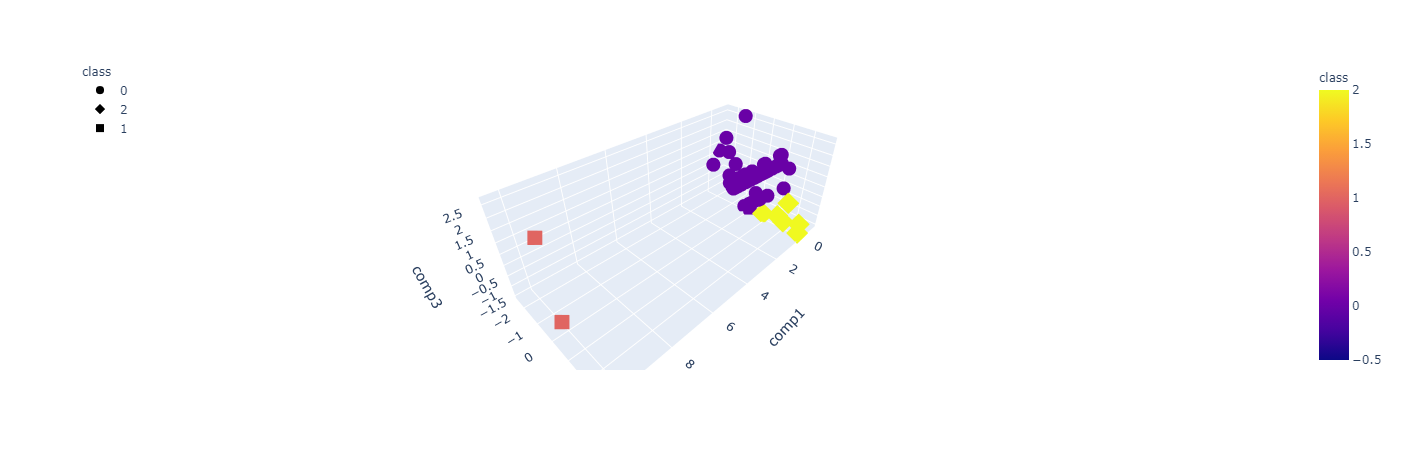

In [35]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    crypto_pca_df,
    x="comp1",
    y="comp2",
    z="comp3",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


#### Table of Tradable Cryptocurrencies

In [ ]:
# Table with tradable cryptos



In [ ]:
# Print the total number of tradable cryptocurrencies

#### Scatter Plot with Tradable Cryptocurrencies

In [ ]:
# Scale data to create the scatter plot



In [ ]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"

